# Regression Task MLP
## Importing the libraries

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importing the dataset and display the first few rows

In [ ]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive

# Mount Google Drive ke Colab
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'
df = pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.025

## Exploring the dataset and select target

In [ ]:
print(df.shape)
print(df.info())
X = df.drop("2001", axis=1)  # Features
y = df["2001"]   # Target

(515344, 91)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  fl

## Splitting the dataset into the Training set and Test set (70:30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature engineering

In [ ]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Create DataLoader for training and testing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## Define the MLP Model



In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.layer2 = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # Apply ReLU activation
        x = self.layer2(x)  # Output layer
        return x

In [ ]:
# Define the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1  # Single output for regression
model = MLP(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Create the Training Loop

In [ ]:
num_epochs = 100  # Number of epochs for training

train_losses = []  # Store the loss values to plot

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [10/100], Loss: 96.0327
Epoch [20/100], Loss: 93.0861
Epoch [30/100], Loss: 91.3423
Epoch [40/100], Loss: 90.3881
Epoch [50/100], Loss: 89.5938
Epoch [60/100], Loss: 88.9501
Epoch [70/100], Loss: 88.2932
Epoch [80/100], Loss: 88.8202
Epoch [90/100], Loss: 88.4657
Epoch [100/100], Loss: 87.7775


## Evaluate the Model

In [ ]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # We don't need to track gradients for evaluation
    y_pred_train = model(X_train_tensor).numpy()
    y_pred_test = model(X_test_tensor).numpy()

## Plot the Results

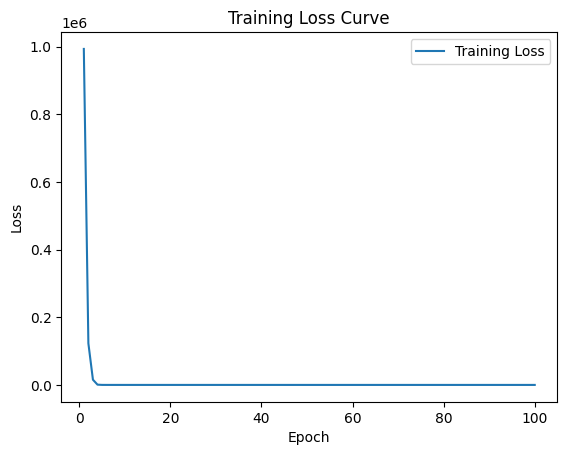

In [ ]:
# Training Loss curve
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

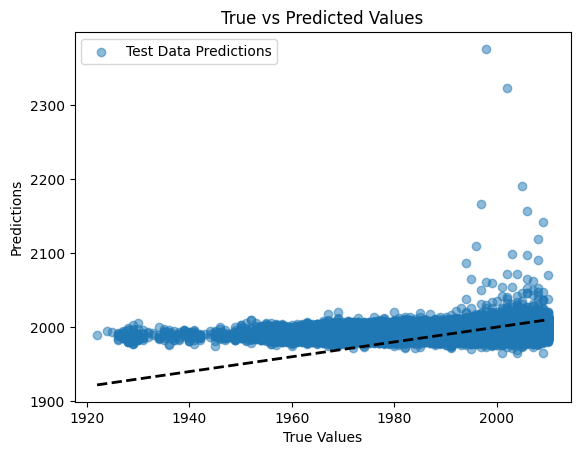

In [ ]:
# Prediction vs True values for Test Data
plt.scatter(y_test, y_pred_test, label='Test Data Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.legend()
plt.show()

## Evaluate the result

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RSquared: {r2:.4f}")

RMSE: 9.3681
MSE: 87.7609
RSquared: 0.2681
